# Anomaly Detection using PCA

# Import Libraries

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd "/content/drive/MyDrive/上課/Data Mining"

/content/drive/MyDrive/上課/Data Mining


In [6]:
# Load datasets
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
data = pd.read_csv(current_path + file)

In [7]:
# Preview data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Describe data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Count total fraud
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


# Do train_test_split and Standardize features

In [10]:
# Suppress warnings
pd.set_option('mode.chained_assignment', None)

# Split to train and test and scale features
dataX = data.drop(['Class'],axis=1)
dataY = data.loc[:,'Class'].copy()

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

featuresToScale = X_train.columns
sX = pp.StandardScaler(copy=True)
X_train.loc[:,featuresToScale] = sX.fit_transform(X_train.loc[:,featuresToScale])
X_test.loc[:,featuresToScale] = sX.transform(X_test.loc[:,featuresToScale])

# Define a evaluation function to determine who is outlier

### Purpose:

使用unsupervisied learning- PCA方法(完全沒有label)來判別是否為異常交易

###  How ?
Calculate reconstruction error

PCA的初衷, 希望用少數的特徵, 就能表示大多數的資料。而對於那些僅用較少的特徵而無法被表示的原資料，通常該資料就是outlier


 1.異常交易是outlier <br>
 2.若逆轉換PCA所還原得到的資料(X_PCA_inverse)和原本的X差愈多, 則該筆資料愈有可能是outlier(即可能是異常的交易)  <br>
 3.對逆轉換PCA後的資料和原資料, 計算其 MSE。MSE愈大表示愈無法表示此資料,此為outlier; 反之, MSE愈小愈能表示原資料 <br>
 4.接著再將MSE, Normalized到0~1 (機率), 當作是利用PCA演算法來預測是否交易異常的可能性(機率) <br>

註: PCA 使用和原本資料特徵數, 是沒有意義的, 因為無法利用上述方法來判別是否為異常交易,因為和原本的資料幾乎相同，沒有太大的誤差。得讓PCA使用少於原資料的特徵數, 才能使用上述MSE的方法。注意，若PCA使用特徵數太少, 也可能會使得每筆資料的MSE都差異很大, 如此也無法有效判別是否為異常交易。
故這要試看看多少的特徵數才能夠準確的判別.
 <br>



In [11]:

def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1) #numpy (190820,30),(190820,30)
    loss = pd.Series(data=loss,index=originalDF.index) # loss  pd.Series :  (190820,)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss)) # normalized loss to 0~1
    return loss

In [12]:
# Plot results
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, _ = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore']) #多個值(在不同threshold下)
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore']) #單一值(precision的平均)

    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

#     fpr, tpr, _ = roc_curve(preds['trueLabel'], \
#                                      preds['anomalyScore'])
#     areaUnderROC = auc(fpr, tpr)

#     plt.figure()
#     plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
#     plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic: \
#     Area under the curve = {0:0.2f}'.format(areaUnderROC))
#     plt.legend(loc="lower right")
    plt.show()

    if returnPreds==True:
        return preds

In [13]:
# View scatterplot using first and second components
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca() #得到當前的 axes
    ax.set_title("Separation of Observations using "+algoName)

# PCA

In [14]:
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30 #(V1,V2,...,V28, time,amount)


pca = PCA(n_components=n_components)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

print(X_train_PCA.shape)
print(X_train_PCA_inverse.shape)


(190820, 30)
(190820, 30)


In [15]:
print("Variance Explained by all 30 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 30 principal components:  1.0


In [16]:
len(pca.explained_variance_ratio_)

30

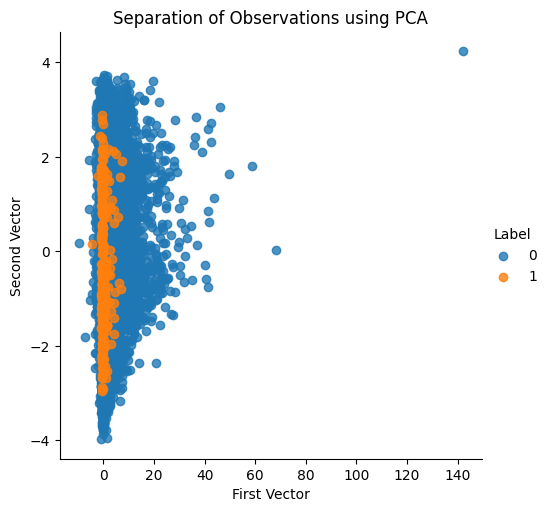

In [17]:
scatterPlot(X_train_PCA, y_train, "PCA")

142087    0.000035
165168    0.000148
235908    0.000338
148255    0.000035
145672    0.000279
            ...   
30023     0.000200
195475    0.001629
48687     0.000426
159608    0.000081
197673    0.000258
Length: 190820, dtype: float64


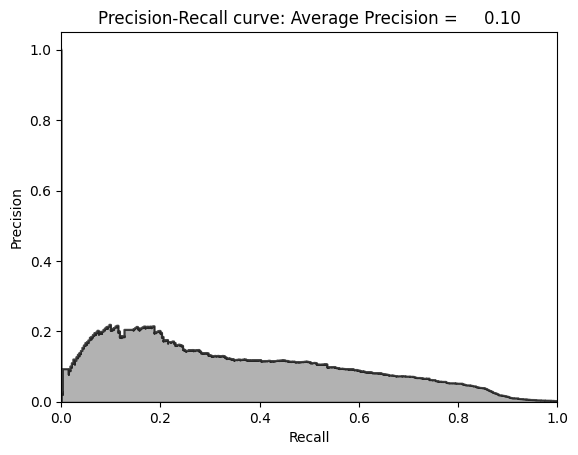

In [18]:
# View plot
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
print(anomalyScoresPCA)
#precision_recall_curve(preds['trueLabel'],preds['prediction'])
preds = plotResults(y_train, anomalyScoresPCA, True)

In [19]:
preds

,trueLabel,anomalyScore
142087,0,0.000035
165168,0,0.000148
235908,0,0.000338
148255,0,0.000035
145672,0,0.000279
...,...,...
30023,0,0.000200
195475,0,0.001629
48687,0,0.000426
159608,0,0.000081


In [38]:
# 27 principal components
from sklearn.decomposition import PCA

n_components = 27
random_state = 2018

pca = PCA(n_components=n_components,random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

print(X_train_PCA.shape)
print(X_train_PCA_inverse.shape)


(190820, 27)
(190820, 30)


In [39]:
pca.components_.shape

(27, 30)

In [40]:
pca.mean_.shape

(30,)

In [41]:
X_train_PCA_inverse

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
142087,-0.601839,-1.009785,1.146953,-0.135846,-0.244600,-0.367136,-0.095383,-0.225861,0.907570,-0.266670,...,0.232429,-0.235192,-0.682573,0.155970,-0.591165,-0.316065,0.214674,0.510988,0.417982,-0.361744
165168,0.643210,0.037526,0.687580,-0.148051,-0.344118,0.652500,-0.630315,0.774278,-0.116503,-0.171707,...,0.101742,-0.461292,-1.068082,0.130709,1.083140,-0.705995,0.233554,0.562180,0.248804,-0.311994
235908,1.571655,0.046699,-0.320265,-0.653908,-1.434660,-0.160418,-0.863823,1.146520,-0.528650,-2.751411,...,0.132257,0.555719,1.961150,0.510473,1.895745,-0.795438,0.222958,0.394025,0.793164,0.614188
148255,0.265569,-0.062469,0.554848,0.395526,-0.339389,0.217103,-0.759402,0.705705,-0.122787,-0.069684,...,-0.023709,-0.381155,-0.808065,0.093520,-0.016977,-0.835373,0.322881,0.616207,0.275087,-0.294262
145672,0.522047,-0.108819,0.559520,0.589847,-0.223760,0.597411,0.550327,0.143039,0.231203,-0.181609,...,0.146977,-0.254878,-0.595972,-0.005893,-0.708997,-1.950739,-0.105306,0.587638,0.742023,-0.297666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30023,-0.906397,-0.309285,0.107132,1.117680,-0.635624,-0.477216,-0.937386,0.355132,-0.269935,-1.320022,...,0.142452,0.334575,1.134875,-0.096276,1.634264,0.741334,-0.280920,-0.109668,0.058900,-0.244832
195475,0.845099,-0.322518,-2.847065,-2.092147,0.763454,-0.877877,0.088278,1.388339,-0.314863,0.267846,...,3.251943,1.353059,-0.247714,-1.850902,0.615073,-0.849737,1.304969,-0.902995,0.438215,4.887784
48687,-0.745557,0.008414,-1.158098,-0.319300,0.239270,-0.689518,-0.337933,0.597919,-0.260844,0.191089,...,1.555323,0.066440,-1.651197,-0.868550,-0.609520,0.208684,1.759369,-0.504981,0.281707,1.991746
159608,0.768264,-0.030289,0.530246,0.107136,-0.497069,0.533382,-0.377917,0.687116,-0.079259,0.020081,...,0.020908,-0.484231,-1.128429,-0.114104,-1.658675,-0.547881,0.448751,0.599262,0.242650,-0.290724


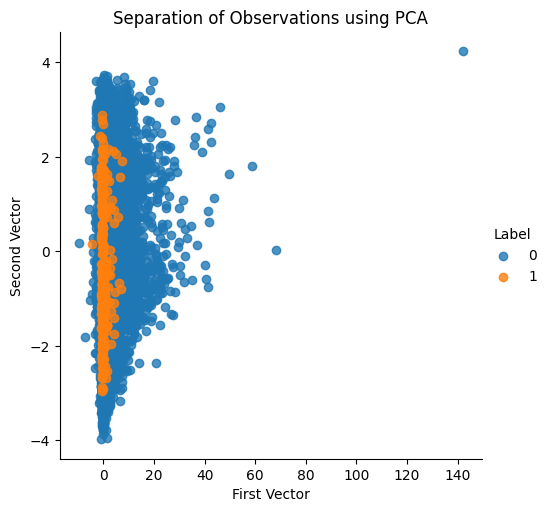

In [42]:
scatterPlot(X_train_PCA, y_train, "PCA")

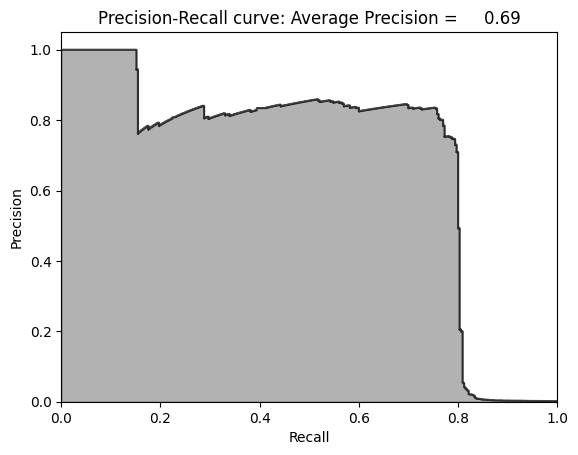

In [43]:
# View plot
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

# Analyze results

In [44]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
#假若取anomalyScore分數的前350名,我們都視為outlier, 也就是認定為異常交易的資料 (當然有可能實際不是)
cutoff = 350
predsTop = preds[:cutoff]

In [45]:
predsTop = preds[:cutoff]
predsTop

,trueLabel,anomalyScore
154684,1,1.000000
151009,1,0.901799
151008,1,0.901799
151007,1,0.901799
151006,1,0.901799
...,...,...
241254,1,0.018049
31041,0,0.017967
217409,0,0.017880
149600,1,0.017865


In [46]:
predsTop.anomalyScore[predsTop.trueLabel==1].count()

np.int64(261)

In [47]:
cutoff


350

In [48]:
len(y_train)

190820

In [49]:
y_train.sum()

np.int64(330)

In [50]:
print("Fraud Caught out of {} Cases:{}".format(y_train.sum(), predsTop.trueLabel.sum()))
#Precision=TP/(TP+FP)
print("Precision: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
#Recall=TP/(TP+FN)
print("Recall: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))


Fraud Caught out of 330 Cases:261
Precision:  0.75
Recall:  0.79


# Evaluate on Test Set

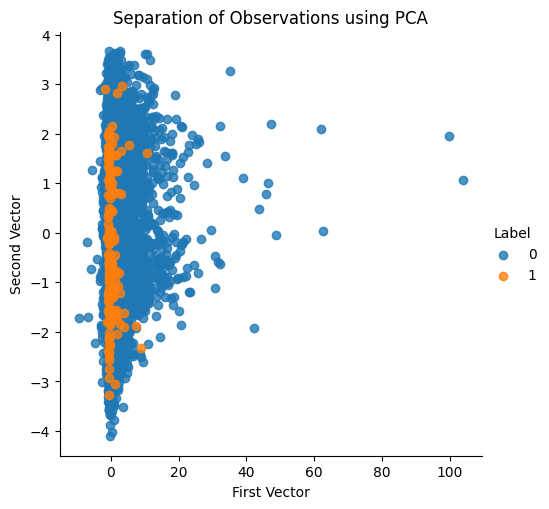

In [51]:
# PCA on Test Set
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_PCA, y_test, "PCA")

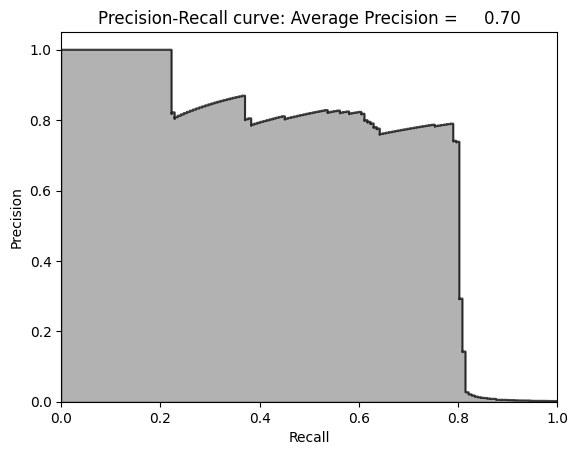

In [52]:
# View plot
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

# Conclusion